In [302]:
import pandas as pd 
import numpy as np 
import os
import pandas as pd

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "datafix.csv")
datafix = pd.read_csv(desktop_path)


In [303]:
datafix = datafix.set_index("Date")

In [304]:
datafix["sma30"] = datafix["Close"].rolling(30).mean()
datafix["smaspread"] = datafix["sma30"] - datafix["Close"] 

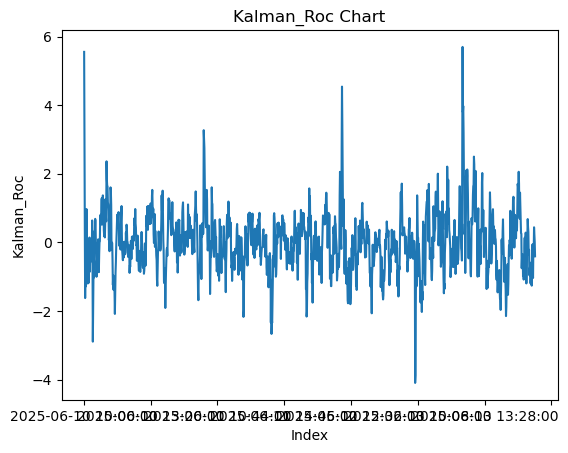

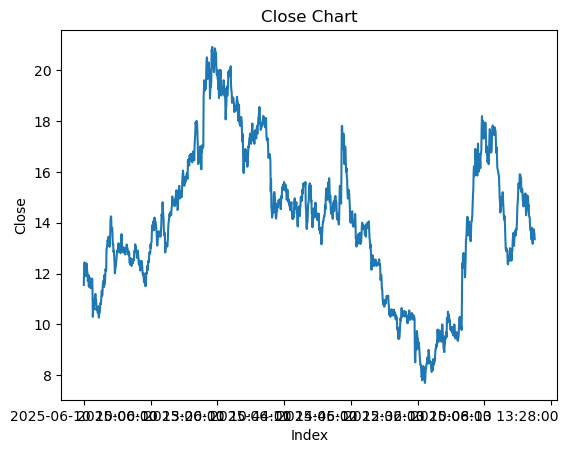

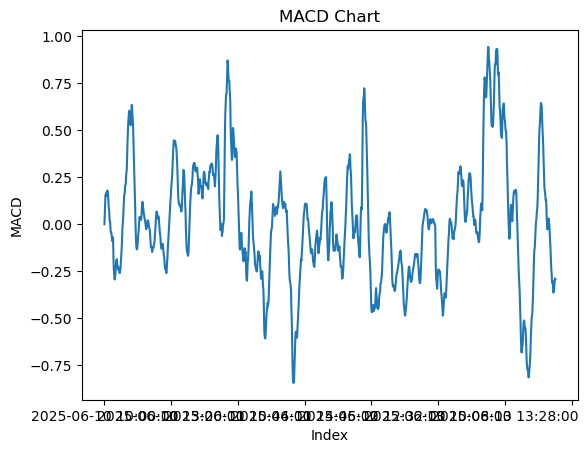

Column 'RSI' not found in datafix DataFrame.
Column 'sma' not found in datafix DataFrame.


In [305]:
import matplotlib.pyplot as plt
def plot(name):
    column_to_plot = name  # Replace with your actual column name

    if column_to_plot in datafix.columns:
     datafix[column_to_plot].plot(kind='line', title=f"{column_to_plot} Chart")
     plt.xlabel("Index")
     plt.ylabel(column_to_plot)
     plt.show()
    else:
        print(f"Column '{column_to_plot}' not found in datafix DataFrame.")
plot("Kalman_Roc")
plot("Close")
plot("MACD")
plot("RSI")
plot("sma")

In [306]:
import pandas as pd

def compute_rsi(df, column="Close", period=14):
    # Calculate price differences
    delta = df[column].diff()
    # Separate gains and losses
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    # Calculate exponential moving averages of gains and losses
    avg_gain = gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
    # Calculate RS and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    # Add RSI to dataframe
    df['RSI'] = rsi
    return df

compute_rsi(datafix)


,Open,High,Low,Close,Volume,Kalman,Kalman_Roc,MACD,Signal,MACD_Hist,days_to_expiry,stock price,strike,rfr,type,IV,IVROC,sma30,smaspread,RSI
Date,,,,,,,,,,,,,,,,,,,,
2025-06-10 10:00:00,11.49,11.80,11.35,11.55,69.0,11.550000,NaN,0.000000,0.000000,0.000000,10.0,315.83,320,0.0429,p,0.454486,NaN,NaN,NaN,NaN
2025-06-10 10:01:00,11.60,12.40,11.60,12.25,120.0,12.191522,5.554306,0.055840,0.011168,0.044672,10.0,316.65,320,0.0429,p,0.509360,12.073698,NaN,NaN,NaN
2025-06-10 10:02:00,12.30,12.65,12.27,12.44,121.0,12.502266,2.548853,0.114110,0.031757,0.082354,10.0,317.18,320,0.0429,p,0.531701,4.386121,NaN,NaN,NaN
2025-06-10 10:03:00,12.30,12.60,12.25,12.40,118.0,12.558558,0.450251,0.155272,0.056460,0.098813,10.0,317.15,320,0.0429,p,0.529047,-0.499130,NaN,NaN,NaN
2025-06-10 10:04:00,12.40,12.40,11.95,12.05,267.0,12.354756,-1.622816,0.157832,0.076734,0.081098,10.0,316.46,320,0.0429,p,0.494937,-6.447468,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-13 15:55:00,13.25,13.64,13.05,13.44,82.0,13.345323,-0.228850,-0.351478,-0.299315,-0.052163,7.0,325.07,320,0.0429,p,0.896905,-0.664812,14.298667,0.858667,38.810313
2025-06-13 15:56:00,13.50,13.79,13.50,13.74,14.0,13.404025,0.439872,-0.321475,-0.303747,-0.017728,7.0,325.58,320,0.0429,p,0.926111,3.256369,14.266667,0.526667,44.807862
2025-06-13 15:57:00,13.67,13.75,13.65,13.66,21.0,13.432462,0.212148,-0.300687,-0.303135,0.002448,7.0,325.53,320,0.0429,p,0.920380,-0.618850,14.223667,0.563667,43.581136


In [307]:
    import numpy as np

    # Precompute the rolling mean of Kalman_Roc (window=3)
    datafix["Kalman_Roc_roll3"] = datafix["Kalman_Roc"].rolling(3).mean()

    buy_condition = (
        (datafix["MACD_Hist"] > 0.10) &
        (datafix["Kalman_Roc"] > 0.1) &
        (datafix["Volume"].rolling(3).mean() < datafix["Volume"].rolling(12).mean()) 
    )

    datafix["Signal"] = None
    datafix["max_gain"] = np.nan

    in_position = False
    current_max = np.nan
    signals = [None] * len(datafix)

    for int_idx, (df_idx, row) in enumerate(datafix.iterrows()):
        if not in_position:
            if buy_condition.loc[df_idx]:
                signals[int_idx] = "buy"
                in_position = True
                current_max = row["Close"]
                datafix.at[df_idx, "max_gain"] = current_max
        else:
            current_max = max(current_max, row["Close"])
            datafix.at[df_idx, "max_gain"] = current_max
            if (row["Close"] < current_max * 0.80) or (row["Kalman_Roc_roll3"] < -0.75):
                signals[int_idx] = "sell"
                in_position = False
                current_max = np.nan

    datafix["Signal"] = signals
    datafix["AvgVol"] = datafix["Volume"].rolling(20).mean()



In [308]:
datafix.tail(10)

,Open,High,Low,Close,Volume,Kalman,Kalman_Roc,MACD,Signal,MACD_Hist,...,rfr,type,IV,IVROC,sma30,smaspread,RSI,Kalman_Roc_roll3,max_gain,AvgVol
Date,,,,,,,,,,,,,,,,,,,,,
2025-06-13 15:50:00,13.68,13.95,13.67,13.80,273.0,13.659495,-0.114425,-0.308265,None,-0.103440,...,0.0429,p,0.929518,4.822847,14.556000,0.756000,40.131371,-0.652730,NaN,64.30
2025-06-13 15:51:00,13.94,13.94,13.74,13.80,53.0,13.650683,-0.064515,-0.302239,None,-0.077931,...,0.0429,p,0.930943,0.153383,14.505333,0.705333,40.131371,-0.480248,NaN,65.05
2025-06-13 15:52:00,13.84,13.84,13.30,13.33,85.0,13.522678,-0.937717,-0.331567,None,-0.085807,...,0.0429,p,0.889702,-4.430065,14.439667,1.109667,33.765448,-0.372219,NaN,68.75
2025-06-13 15:53:00,13.44,13.45,13.17,13.17,39.0,13.382511,-1.036533,-0.363529,None,-0.094215,...,0.0429,p,0.870506,-2.157594,14.382000,1.212000,31.909749,-0.679588,NaN,68.25
2025-06-13 15:54:00,13.22,13.55,13.22,13.55,20.0,13.375934,-0.049148,-0.354114,None,-0.067841,...,0.0429,p,0.902907,3.722125,14.338667,0.788667,40.301401,-0.674466,NaN,68.80
2025-06-13 15:55:00,13.25,13.64,13.05,13.44,82.0,13.345323,-0.228850,-0.351478,None,-0.052163,...,0.0429,p,0.896905,-0.664812,14.298667,0.858667,38.810313,-0.438177,NaN,66.10
2025-06-13 15:56:00,13.50,13.79,13.50,13.74,14.0,13.404025,0.439872,-0.321475,None,-0.017728,...,0.0429,p,0.926111,3.256369,14.266667,0.526667,44.807862,0.053958,NaN,65.80
2025-06-13 15:57:00,13.67,13.75,13.65,13.66,21.0,13.432462,0.212148,-0.300687,None,0.002448,...,0.0429,p,0.920380,-0.618850,14.223667,0.563667,43.581136,0.141056,NaN,65.20
2025-06-13 15:58:00,13.70,13.70,13.57,13.57,52.0,13.433916,0.010829,-0.288153,None,0.011986,...,0.0429,p,0.914080,-0.684486,14.172333,0.602333,42.182007,0.220949,NaN,66.80


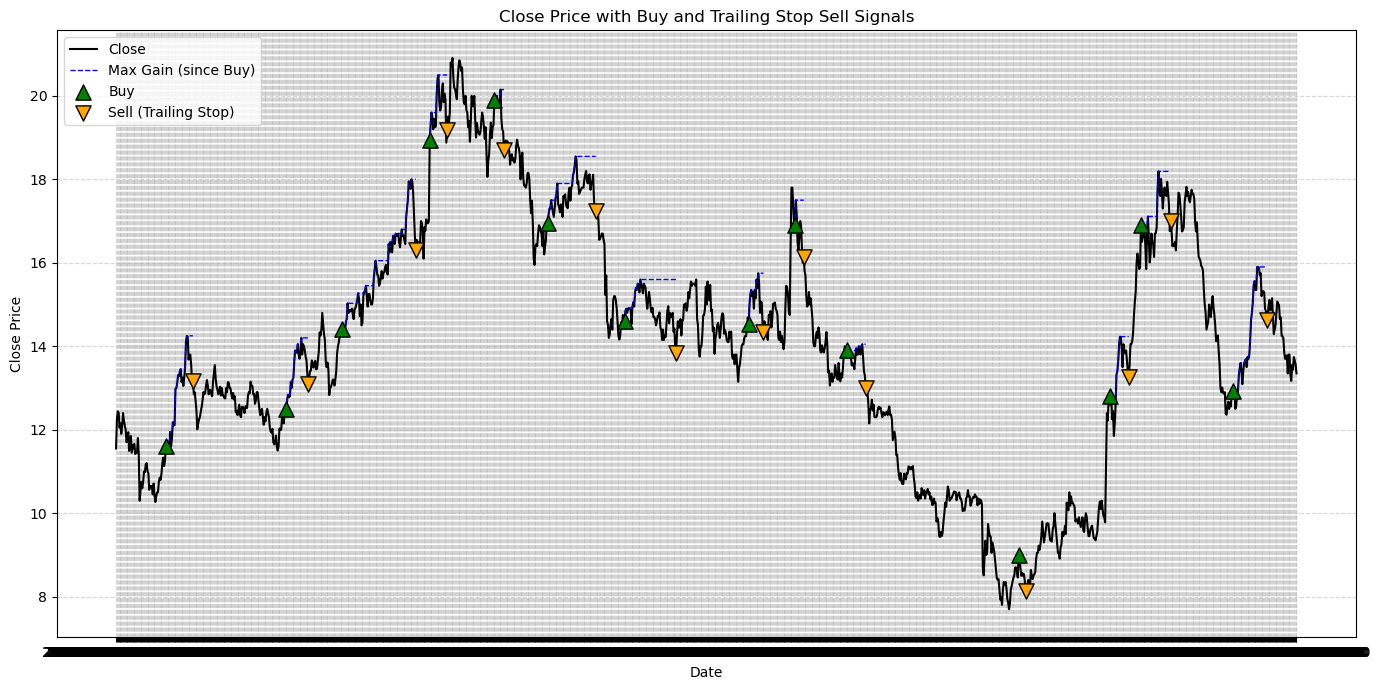

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the Close price
plt.plot(datafix.index, datafix["Close"], label="Close", color="black", linewidth=1.5)

# (Optional) Plot the running max_gain as a blue dashed line
plt.plot(datafix.index, datafix["max_gain"], label="Max Gain (since Buy)", color="blue", linestyle="dashed", linewidth=1)

# Plot buy signals (green upward triangle)
buy_signals = datafix[datafix["Signal"] == "buy"]
plt.scatter(buy_signals.index, buy_signals["Close"], marker="^", color="green", edgecolor="black", s=120, label="Buy", zorder=3)

# Plot sell signals (orange downward triangle)
sell_signals = datafix[datafix["Signal"] == "sell"]
plt.scatter(sell_signals.index, sell_signals["Close"], marker="v", color="orange", edgecolor="black", s=120, label="Sell (Trailing Stop)", zorder=3)

plt.title("Close Price with Buy and Trailing Stop Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()



plt.show()


In [310]:
import pandas as pd

# Initialize lists to store trade details
buy_indices = []
sell_indices = []
buy_prices = []
sell_prices = []
buy_dates = []
sell_dates = []

in_position = False

for idx, row in datafix.iterrows():
    if not in_position and row["Signal"] == "buy":
        buy_indices.append(idx)
        buy_prices.append(row["Close"])
        buy_dates.append(row.name)
        in_position = True
    elif in_position and row["Signal"] == "sell":
        sell_indices.append(idx)
        sell_prices.append(row["Close"])
        sell_dates.append(row.name)
        in_position = False

# Ensure pairs are matched correctly
pairs = min(len(buy_prices), len(sell_prices))
buy_indices = buy_indices[:pairs]
sell_indices = sell_indices[:pairs]
buy_prices = buy_prices[:pairs]
sell_prices = sell_prices[:pairs]
buy_dates = buy_dates[:pairs]
sell_dates = sell_dates[:pairs]

# Calculate returns for each trade
returns = [(sell - buy) / buy for buy, sell in zip(buy_prices, sell_prices)]

# Create the 'test' DataFrame with trade details and returns
test = pd.DataFrame({
    "Buy_Index": buy_indices,
    "Sell_Index": sell_indices,
    "Buy_Date": buy_dates,
    "Sell_Date": sell_dates,
    "Buy_Price": buy_prices,
    "Sell_Price": sell_prices,
    "Return": returns
})


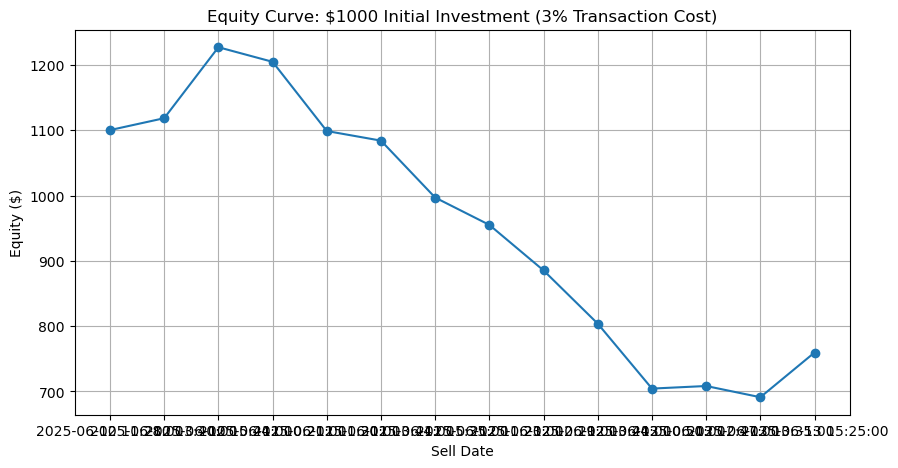

In [311]:
import matplotlib.pyplot as plt

initial_capital = 1000
equity_curve = [initial_capital]

for ret in test["Return"]:
    # Apply 3% transaction cost to each trade
    net_return = (1 + ret) * 0.97  # 3% cost
    equity_curve.append(equity_curve[-1] * net_return)

# Remove the initial capital for plotting (so curve aligns with trades)
equity_curve = equity_curve[1:]
test["Equity"] = equity_curve

plt.figure(figsize=(10,5))
plt.plot(test["Sell_Date"], test["Equity"], marker='o')
plt.title("Equity Curve: $1000 Initial Investment (3% Transaction Cost)")
plt.xlabel("Sell Date")
plt.ylabel("Equity ($)")
plt.grid(True)
plt.show()
